In [50]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import os
path=os.getcwd()
path

'c:\\Yalco_html_css'

In [5]:
data = pd.read_csv("KoreaTravel.csv")


In [6]:

data.head(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
5,11080651401_1284842,2,1,0,120000.0,4,30000.0,NaN,NaN,50000.0,...,0,0,1,0,0,0,0,0,0,1
6,11080770141_1000667,2,1,0,99999.0,3,33333.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
7,11080810811_1059614,2,1,0,180000.0,3,60000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
8,1108084201A_1000674,2,1,1,150000.0,1,150000.0,300000.0,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
9,1109064137A_1127756,2,1,0,85000.0,2,42500.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


In [7]:
data.tail(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
10493,26310310481_1072464,1,2,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
10494,26310380351_1268574,1,2,2,200000.0,4,50000.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
10495,26310380351_1268602,1,2,1,150000.0,4,37500.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
10496,26310380351_1319604,1,2,1,150000.0,3,50000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10497,26310380351_1319605,1,2,2,100000.0,4,25000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10498,26310390321_1301477,1,2,1,250000.0,2,125000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10499,29010110111_1012934,1,2,0,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10500,29010110111_1012999,1,2,0,150000.0,2,75000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10501,29010110231_1042990,1,2,2,249999.0,3,83333.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10502,29010110231_1042991,1,2,2,85000.0,1,85000.0,NaN,NaN,50000.0,...,0,0,0,0,1,0,1,0,0,0


In [8]:
data.info('ID') #변수 명 / 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 339 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    ID                         object 
 1    visit_count                int64  
 2    visit_acq                  int64  
 3    stay                       int64  
 4    COST                       float64
 5    NUM                        int64  
 6    per_COST                   float64
 7    cost_ski_watering          float64
 8    cost_camping               float64
 9    cost_hiking                float64
 10   cost_fishing               float64
 11   cost_costume               float64
 12   cost_bagpack               float64
 13   cost_TOTAL                 float64
 14   cost_per_TOTAL             float64
 15   select_reason_2            float64
 16   select_reason_3            float64
 17   reason_nature              float64
 18   reason_food                float64
 19   reason_leisure         

In [9]:
data['JEJU']=data['JEJU'].astype(int)
data['KYUNG_S']=data['KYUNG_S'].astype(int)
data['KYUNG_N']=data['KYUNG_N'].astype(int)
data['JEON_S']=data['JEON_S'].astype(int)
data['JEON_N']=data['JEON_N'].astype(int)
data['CHOONG_S']=data['CHOONG_S'].astype(int)
data['CHOONG_N']=data['CHOONG_N'].astype(int)
data['GANGWON']=data['GANGWON'].astype(int)
data['KYUNGGI']=data['KYUNGGI'].astype(int)
data['SEJONG']=data['SEJONG'].astype(int)
data['ULSAN']=data['ULSAN'].astype(int)
data['DAEJEON']=data['DAEJEON'].astype(int)
data['GWANGJU']=data['GWANGJU'].astype(int)
data['INCHEON']=data['INCHEON'].astype(int)
data['DAEGU']=data['DAEGU'].astype(int)
data['BUSAN']=data['BUSAN'].astype(int)
data['SEOUL']=data['SEOUL'].astype(int)


In [10]:
data=data.fillna(0) #결측치 처리(NaN 값 0으로 대체)
data.head(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
5,11080651401_1284842,2,1,0,120000.0,4,30000.0,0.0,0.0,50000.0,...,0,0,1,0,0,0,0,0,0,1
6,11080770141_1000667,2,1,0,99999.0,3,33333.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
7,11080810811_1059614,2,1,0,180000.0,3,60000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
8,1108084201A_1000674,2,1,1,150000.0,1,150000.0,300000.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
9,1109064137A_1127756,2,1,0,85000.0,2,42500.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [11]:
data.drop(['ID'],axis=1,inplace=True) #불필요한 변수들삭제
data.drop(['select_reason_2'],axis=1,inplace=True)
data.drop(['select_reason_3'],axis=1,inplace=True)

In [12]:
#지역별로 데이터 프레임 생성
JEJU = pd.DataFrame() 
KYUNG_S = pd.DataFrame()
KYUNG_N = pd.DataFrame()
JEON_S = pd.DataFrame()
JEON_N = pd.DataFrame()
CHOONG_S = pd.DataFrame()
CHOONG_N = pd.DataFrame()
GANGWON = pd.DataFrame()
KYUNGGI = pd.DataFrame()
SEJONG = pd.DataFrame()
ULSAN = pd.DataFrame()
DAEJEON = pd.DataFrame()
GWANGJU = pd.DataFrame()
INCHEON = pd.DataFrame()
DAEGU = pd.DataFrame()
BUSAN = pd.DataFrame()
SEOUL = pd.DataFrame()

In [13]:
JEJU = data.loc[data['JEJU']== 1]
KYUNG_S = data.loc[data['KYUNG_S']== 1]
KYUNG_N = data.loc[data['KYUNG_N']== 1]
JEON_S = data.loc[data['JEON_S']== 1]
JEON_N = data.loc[data['JEON_N']== 1]
CHOONG_S = data.loc[data['CHOONG_S']== 1]
CHOONG_N = data.loc[data['CHOONG_N']== 1]
GANGWON = data.loc[data['GANGWON']== 1]
KYUNGGI = data.loc[data['KYUNGGI']== 1]
SEJONG = data.loc[data['SEJONG']== 1]
ULSAN = data.loc[data['ULSAN']== 1]
DAEJEON = data.loc[data['DAEJEON']== 1]
GWANGJU = data.loc[data['GWANGJU']== 1]
INCHEON = data.loc[data['INCHEON']== 1]
DAEGU = data.loc[data['DAEGU']== 1]
BUSAN = data.loc[data['BUSAN']== 1]
SEOUL = data.loc[data['SEOUL']== 1]

In [14]:
# 만족도, 재방문률, 추천정도를 합쳐 관광객 선호도 점수를 만들어서 평가
seoul = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
busan = BUSAN['Satify']+BUSAN['revisit']+BUSAN['recommend']
daegu = DAEGU['Satify']+DAEGU['revisit']+DAEGU['recommend']
incheon = INCHEON['Satify']+INCHEON['revisit']+INCHEON['recommend']
gwangju = GWANGJU['Satify']+GWANGJU['revisit']+GWANGJU['recommend']
daejeon = DAEJEON['Satify']+DAEJEON['revisit']+DAEJEON['recommend']
ulsan = ULSAN['Satify']+ULSAN['revisit']+ULSAN['recommend']
sejong = SEJONG['Satify']+SEJONG['revisit']+SEJONG['recommend']
kyunggi = KYUNGGI['Satify']+KYUNGGI['revisit']+KYUNGGI['recommend']
gangwon = GANGWON['Satify']+GANGWON['revisit']+GANGWON['recommend']
choong_n = CHOONG_N['Satify']+CHOONG_N['revisit']+CHOONG_N['recommend']
choong_s = CHOONG_S['Satify']+CHOONG_S['revisit']+CHOONG_S['recommend']
jeon_n = JEON_N['Satify']+JEON_N['revisit']+JEON_N['recommend']
jeon_s = JEON_S['Satify']+JEON_S['revisit']+JEON_S['recommend']
kyung_n = KYUNG_N['Satify']+KYUNG_N['revisit']+KYUNG_N['recommend']
kyung_s = KYUNG_S['Satify']+KYUNG_S['revisit']+KYUNG_S['recommend']
jeju = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']

In [15]:
print("서울:",seoul.mean())
print("부산:",busan.mean())
print("대구:",daegu.mean())
print("인천:",incheon.mean())
print("광주:",gwangju.mean())
print("대전:",daejeon.mean())
print("울산:",ulsan.mean())
print("세종:",sejong.mean())
print("경기:",kyunggi.mean())
print("강원:",gangwon.mean())
print("충청북도:",choong_n.mean())
print("충청남도:",choong_s.mean())
print("전라북도:",jeon_n.mean())
print("전라남도:",jeon_s.mean())
print("경상남도:",kyung_n.mean())
print("경상북도:",kyung_s.mean())
print("제주:",jeju.mean())


서울: 8.510917030567686
부산: 11.225757575757576
대구: 9.01063829787234
인천: 10.151162790697674
광주: 7.901639344262295
대전: 8.443661971830986
울산: 9.972850678733032
세종: 8.978260869565217
경기: 10.12996632996633
강원: 11.84051329055912
충청북도: 9.457202505219207
충청남도: 10.670305676855895
전라북도: 11.404255319148936
전라남도: 11.39543057996485
경상남도: 10.529411764705882
경상북도: 10.704456606724003
제주: 12.206521739130435


In [16]:
JEJU.head()

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
17,2,1,2,550000.0,1,550000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
34,2,1,1,200000.0,2,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
48,2,1,3,400000.0,1,400000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
58,2,1,1,1400000.0,4,350000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [17]:
cols_jeju=JEJU.columns.tolist()
cols_seoul=SEOUL.columns.tolist()

In [18]:
#column unique 값이 하나인 column명에 대한 리스트 생성
oneValue_jeju=[]
for j in cols_jeju:
  if JEJU[j].nunique()==1:
    oneValue_jeju.append(j)

oneValue_seoul=[]
for s in cols_seoul:
  if SEOUL[s].nunique()==1:
    oneValue_seoul.append(s)

print(oneValue_jeju)
print(oneValue_seoul)


['cost_camping', 'reason_gamble', 'accom_no', 'pre_no', 'INCHEON', 'GWANGJU', 'DAEJEON', 'SEJONG', 'JEJU', 'SDAY_30', 'SDAY_31', 'info_gain_9.0', 'transport_9.0', 'transport_11.0', 'edu_level_1', 'edu_state_3.0', 'edu_state_5.0', 'marriage_5', 'householder_edu_level_1.0', 'householder_edu_level_8.0', 'job_1.0', 'job_6.0', 'job_10.0', 'earn_self_10', 'earn_self_11', 'earn_self_12', 'residential_area_29', 'BMAR_5']
['cost_ski_watering', 'cost_camping', 'reason_gamewatching', 'reason_gamble', 'SEOUL', 'SEJONG', 'SDAY_30', 'VAC_3.0', 'info_gain_4.0', 'edu_level_1', 'edu_level_8', 'edu_state_5.0', 'marriage_5', 'householder_edu_level_1.0', 'householder_edu_level_8.0', 'job_10.0', 'earn_self_10', 'earn_self_11', 'earn_self_12', 'residential_area_11', 'residential_area_29', 'BMAR_5']


In [19]:
#oneValue 중 값이 0인 칼럼 drop
for v in oneValue_jeju:
  if JEJU[v].unique() in [0]:
    JEJU.drop(v,axis=1,inplace=True)
  
for v in oneValue_seoul:
  if SEOUL[v].unique() in [0]:
    SEOUL.drop(v,axis=1,inplace=True) 


C:\Temp\ipykernel_15604\990813617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JEJU.drop(v,axis=1,inplace=True)
C:\Temp\ipykernel_15604\990813617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JEJU.drop(v,axis=1,inplace=True)
C:\Temp\ipykernel_15604\990813617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JEJU.drop(v,axis=1,inplace=True)
C:\Temp\ipykernel_15604\990813617.py:4: SettingWithCopyWarning: 
A value is trying

In [20]:
print(len(JEJU.columns.tolist()))
print(len(SEOUL.columns.tolist()))

#두 데이터 칼럼 수 다름-> 두 데이터의 비교를 위해 중복되는 칼럼만 추출


309
315


In [21]:
#추출 방법> set 이용

In [22]:
#cols_jeju, cols_seoul update
cols_jeju=JEJU.columns.tolist()
cols_seoul=SEOUL.columns.tolist()

In [23]:
intersection_jeju=list(set(cols_jeju) & set(cols_seoul))
intersection_seoul=list(set(cols_seoul) & set(cols_jeju))
intersection_jeju==intersection_seoul
#같음 확인 후 하나로 통일하여 사용

True

In [24]:
intersection_cols=intersection_jeju

In [25]:
#공통 칼럼명으로만 이루어진 dataframe으로 update
JEJU=pd.DataFrame(JEJU,columns=intersection_cols)
SEOUL=pd.DataFrame(SEOUL,columns=intersection_cols)

In [84]:
#JEJU, SEOUL 변수 간 heatmap을 그려 상관관계 분석을 통해 변수 선정

In [85]:
#상관관계 분석

In [47]:
jeju_nvisit=JEJU['visit_count']
jeju_satify=JEJU['Satify']
jeju_recommend=JEJU['recommend']

jeju_effect=JEJU[['visit_count','Satify','recommend']]
jeju_effect

,visit_count,Satify,recommend
3,3,4.0,4.0
17,2,4.0,4.0
34,2,4.0,4.0
48,2,4.0,3.0
58,2,4.0,4.0
...,...,...,...
9397,1,0.0,0.0
10133,1,0.0,0.0
10234,1,0.0,0.0
10270,1,0.0,0.0


In [58]:
jeju_corr=JEJU.corr(method='pearson')
jeju_corr_select=jeju_corr[['visit_count','Satify','recommend']]

In [59]:
jeju_corr_select

,visit_count,Satify,recommend
SDAY_29,-0.039990,0.076622,-0.003804
EMONTH_5,-0.007275,-0.071278,-0.047576
earn_self_2,-0.084814,-0.084483,-0.081476
BSEX_1,0.002942,0.058963,0.006238
precost_per_TOTAL,-0.025104,0.021508,-0.011077
...,...,...,...
EDAY_26,0.038289,0.029312,0.046192
SDAY_23,-0.046502,0.054448,0.040871
earn_self_7,-0.056868,0.075322,0.065687
SDAY_3,0.012905,0.097968,0.048447


<AxesSubplot:>

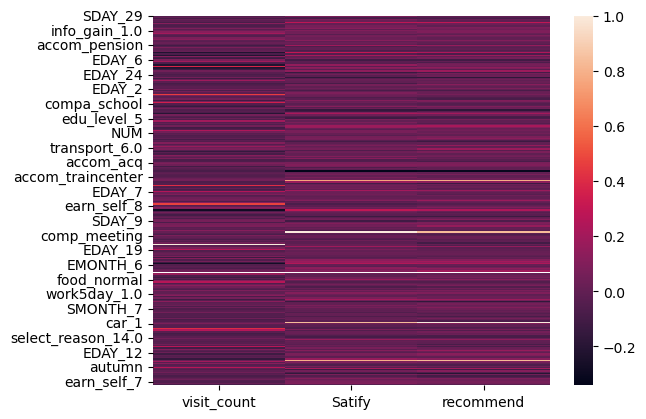

In [61]:
sns.heatmap(jeju_corr_select, annot=False)

In [ ]:
#칼럼수가 너무 많아 분석에 어려움이 생김-> 상관계수 값의 범위를 0.4 초과로 정하여 다시 분석

In [77]:
jeju_visit_corr=jeju_corr_select[['visit_count']]
jeju_satify_corr=jeju_corr_select[['Satify']]
jeju_recomm_corr=jeju_corr_select[['recommend']]

jeju_visit_corr=jeju_visit_corr[jeju_visit_corr['visit_count']>0.4]
jeju_satify_corr=jeju_satify_corr[jeju_satify_corr['Satify']>0.4]
jeju_recomm_corr=jeju_recomm_corr[jeju_recomm_corr['recommend']>0.4]

In [81]:
jeju_visit_corr

,visit_count
KYUNG_N,0.459265
KYUNGGI,0.403826
transport_1.0,0.475455
visit_count,1.000000
KYUNG_S,0.403089


In [82]:
jeju_satify_corr

,Satify
pre_transport,0.758949
Satify,1.000000
recommend,0.836023
revisit,0.789829


In [83]:
jeju_recomm_corr

,recommend
pre_transport,0.782310
Satify,0.836023
recommend,1.000000
revisit,0.823749


In [42]:
'''
for v in intersection_cols:
  print(v)
  X=JEJU[v].values
  #print('Covariance: {:.2f}'.format(np.cov(X,jeju_nvisit)[0,1]))
  print('Correlation: {:.3f}'.format(stats.pearsonr(X,jeju_nvisit)[0]))
  print('P-value: {:.4f}'.format(stats.pearsonr(X,jeju_nvisit)[1]))
  print('\n')
'''
  

SDAY_29
Correlation: -0.040
P-value: 0.5082


EMONTH_5
Correlation: -0.007
P-value: 0.9042


earn_self_2
Correlation: -0.085
P-value: 0.1600


BSEX_1
Correlation: 0.003
P-value: 0.9612


precost_per_TOTAL
Correlation: -0.025
P-value: 0.6780


reason_nature
Correlation: -0.079
P-value: 0.1891


SMONTH_10
Correlation: 0.114
P-value: 0.0591


info_gain_6.0
Correlation: -0.057
P-value: 0.3466


SDAY_22
Correlation: -0.066
P-value: 0.2752


reason_religion
Correlation: -0.023
P-value: 0.7036


SDAY_7
Correlation: 0.088
P-value: 0.1437


EDAY_18
Correlation: -0.036
P-value: 0.5489


info_gain_1.0
Correlation: 0.027
P-value: 0.6504


BMAR_2
Correlation: 0.118
P-value: 0.0509


SDAY_16
Correlation: 0.204
P-value: 0.0006


select_reason_9.0
Correlation: -0.010
P-value: 0.8698


cost_TOTAL
Correlation: -0.047
P-value: 0.4358


accom_motel
Correlation: -0.046
P-value: 0.4440


residential_area_21
Correlation: 0.073
P-value: 0.2247


working_1
Correlation: 0.116
P-value: 0.0545


edu_classify_4
Co

c:\Users\ros43\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
